# LOTTERY

## Data Analyst

### Using

In [111]:
import squarify
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Contract Fields

In [112]:
CN_BASE_NUM = 'Number'  # column name base number
CN_HEAD_CNT = 'Head Count'  # column name head count
CN_HEAD_CONS = 'Head Consecutive'  # column name head consecutive
CN_HEAD_RATE = 'Head Rate'  # column name head consecutive
CN_TAIL_CNT = 'Tail Count'  # column name tail count
CN_TAIL_CONS = 'Tail Consecutive'  # column name tail consecutive
CN_TAIL_RATE = 'Tail Rate'  # column name tail consecutive

### Contract Methods

In [113]:
# Try parse to int
def try_prs_int(s, is_head):
    x = s.str.split().str[0] if is_head else s
    return pd.to_numeric(x, errors='coerce').astype('Int64') if is_head else pd.to_numeric(x, errors='coerce').astype('Int64')

In [114]:
# Compare value
def cmp_val(s, x):
    return s.iloc[np.argmin(abs(s - x))]

In [115]:
# Compare column
def cmp_col(df, s, x, col_name):
    return df.loc[s == x, col_name].iloc[0]

In [116]:
# Linear Regression
def lin_reg(df, ip_col_name_cnt, ip_col_name_cons, op_col_name):
    # prepare data for training
    X = df[[ip_col_name_cnt, ip_col_name_cons]]
    y = df[op_col_name]
    # train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    # predict the next number in the sequence
    return int(round(model.predict(X.tail(1))[0]))

In [117]:
# Probability calculate
def prblty_calc(df, ip_col_name_cnt, ip_col_name_cons, op_col_name, is_high):
    col_name = 'Count Consecutive'
    df_temp = df
    df_temp[col_name] = df_temp[ip_col_name_cnt] * df_temp[ip_col_name_cons]
    idx = 0 if is_high else -1
    return df_temp.sort_values(col_name, ascending=False).iloc[idx][op_col_name]

### Processing

In [118]:
df = pd.read_excel('data.xlsx')

In [119]:
base_num = try_prs_int(df[CN_BASE_NUM], False)
head_cnt = try_prs_int(df[CN_HEAD_CNT], True)
head_cons = try_prs_int(df[CN_HEAD_CONS], False)
tail_cnt = try_prs_int(df[CN_TAIL_CNT], True)
tail_cons = try_prs_int(df[CN_TAIL_CONS], False)

In [120]:
valid = (base_num.notna()
         & head_cnt.notna()
         & head_cons.notna()
         & tail_cnt.notna()
         & tail_cons.notna()
         & base_num.ge(0)
         & head_cnt.ge(0)
         & head_cons.ge(0)
         & tail_cnt.ge(0)
         & tail_cons.ge(0))

In [121]:
base_num = base_num.loc[valid]
head_cnt = head_cnt.loc[valid]
head_cons = head_cons.loc[valid] + 1
tail_cnt = tail_cnt.loc[valid]
tail_cons = tail_cons.loc[valid] + 1

In [122]:
size_num = len(base_num)
rng_num = np.linspace(min(base_num), max(base_num), size_num)

In [123]:
df_new = pd.DataFrame({
    CN_BASE_NUM: base_num,
    CN_HEAD_CNT: head_cnt,
    CN_HEAD_CONS: head_cons,
    CN_TAIL_CNT: tail_cnt,
    CN_TAIL_CONS: tail_cons,
    CN_HEAD_RATE: head_cnt * head_cons,
    CN_TAIL_RATE: tail_cnt * tail_cons
})

In [124]:
head_rate = df_new[CN_HEAD_RATE]
tail_rate = df_new[CN_TAIL_RATE]

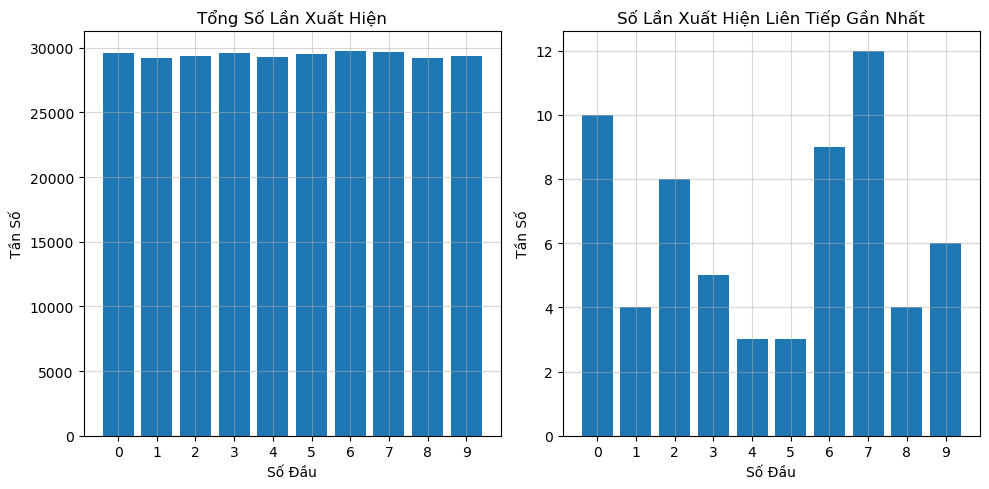

In [125]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot line chart of frequency count
ax1.bar(base_num, head_cnt)
ax1.set_title('Tổng Số Lần Xuất Hiện')
ax1.set_xlabel('Số Đầu')
ax1.set_ylabel('Tần Số')
ax1.set_xticks(rng_num)
ax1.grid(alpha=0.5)

# Plot line chart of frequency consecutive
ax2.bar(base_num, head_cons)
ax2.set_title('Số Lần Xuất Hiện Liên Tiếp Gần Nhất')
ax2.set_xlabel('Số Đầu')
ax2.set_ylabel('Tần Số')
ax2.set_xticks(rng_num)
ax2.grid(alpha=0.5)

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

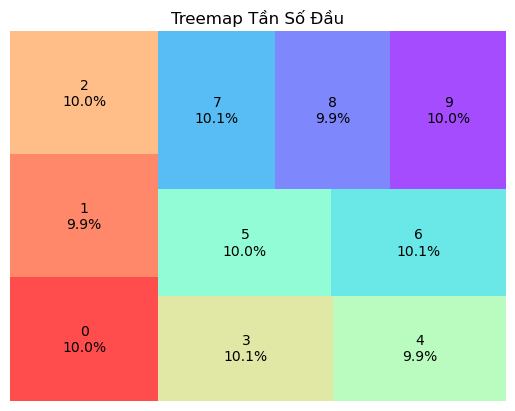

In [126]:
# Create a list of sizes
head_sizes = head_cnt.tolist()

# Create the treemap
squarify.plot(sizes=head_sizes, label=df_new.apply(lambda x: f'{x[CN_BASE_NUM]}\n{x[CN_HEAD_CNT] / sum(head_sizes) * 100:.1f}%', axis=1), color=cm.rainbow_r(np.linspace(0, 1, len(df_new))), alpha=0.7)

# Customize the formatting and display the treemap
plt.axis('off')
plt.title('Treemap Tần Số Đầu')
plt.show()

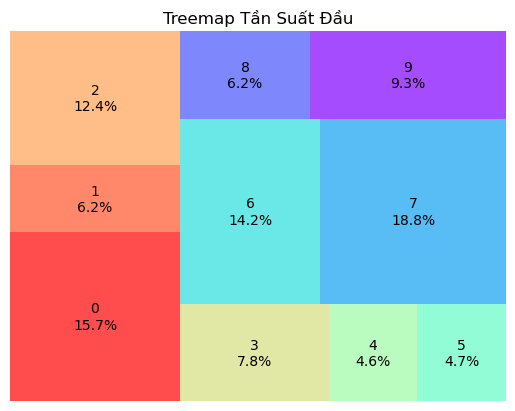

In [127]:
# Create a list of sizes
head_rate_sizes = head_rate.tolist()

# Create the treemap
squarify.plot(sizes=head_rate_sizes, label=df_new.apply(lambda x: f'{x[CN_BASE_NUM]}\n{x[CN_HEAD_RATE] / sum(head_rate_sizes) * 100:.1f}%', axis=1), color=cm.rainbow_r(np.linspace(0, 1, len(df_new))), alpha=0.7)

# Customize the formatting and display the treemap
plt.axis('off')
plt.title('Treemap Tần Suất Đầu')
plt.show()

In [128]:
cnt_heads, intvl_heads = np.histogram(head_cnt, bins=10)
mode_lctn_head = np.argmax(cnt_heads)

In [129]:
min_head = head_cnt.min()
max_head = head_cnt.max()
mean_head = head_cnt.mean()
median_head = head_cnt.median()
mode_left_head = intvl_heads[mode_lctn_head]
mode_right_head = intvl_heads[mode_lctn_head + 1]

In [130]:
min_num_head = cmp_col(df_new, head_cnt, min_head, CN_BASE_NUM)
max_num_head = cmp_col(df_new, head_cnt, max_head, CN_BASE_NUM)
mean_num_head = cmp_col(df_new, head_cnt, cmp_val(head_cnt, mean_head), CN_BASE_NUM)
median_num_head = cmp_col(df_new, head_cnt, cmp_val(head_cnt, median_head), CN_BASE_NUM)
mode_num_head_left = cmp_col(df_new, head_cnt, cmp_val(head_cnt, mode_left_head), CN_BASE_NUM)
mode_num_head_right = cmp_col(df_new, head_cnt, cmp_val(head_cnt, mode_right_head), CN_BASE_NUM)

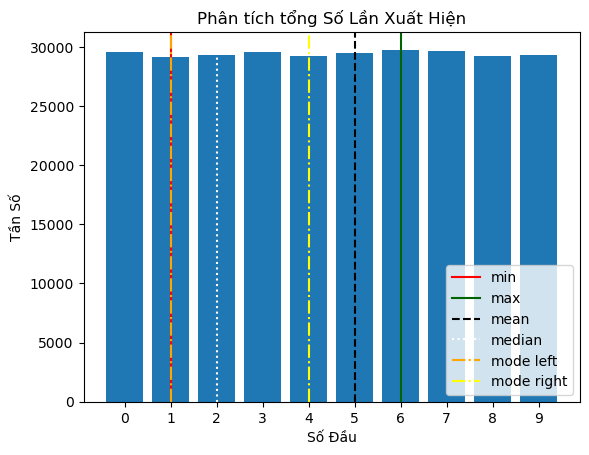

In [131]:
# Plot bar chart
plt.bar(base_num, head_cnt)

# Add vertical lines
plt.axvline(min_num_head, color='red', linestyle='-', label='min')
plt.axvline(max_num_head, color='darkgreen', linestyle='-', label='max')
plt.axvline(mean_num_head, color='black', linestyle='--', label='mean')
plt.axvline(median_num_head, color='white', linestyle=':', label='median')
plt.axvline(mode_num_head_left, color='orange', linestyle='-.', label='mode left')
plt.axvline(mode_num_head_right, color='yellow', linestyle='-.', label='mode right')

# Add a legend
plt.legend(loc='lower right')

# Set the x and y axis labels and the title
plt.title('Phân tích tổng Số Lần Xuất Hiện')
plt.xlabel('Số Đầu')
plt.ylabel('Tần Số')

# Set the x an y axis tick marks
plt.xticks(rng_num)

# Display the plot
plt.show()

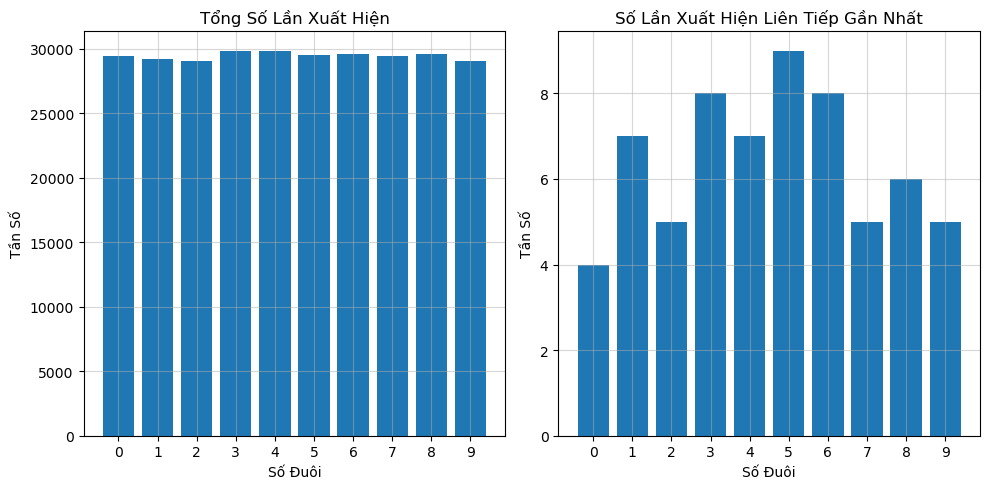

In [132]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot line chart of frequency count
ax1.bar(base_num, tail_cnt)
ax1.set_title('Tổng Số Lần Xuất Hiện')
ax1.set_xlabel('Số Đuôi')
ax1.set_ylabel('Tần Số')
ax1.set_xticks(rng_num)
ax1.grid(alpha=0.5)

# Plot line chart of frequency consecutive
ax2.bar(base_num, tail_cons)
ax2.set_title('Số Lần Xuất Hiện Liên Tiếp Gần Nhất')
ax2.set_xlabel('Số Đuôi')
ax2.set_ylabel('Tần Số')
ax2.set_xticks(rng_num)
ax2.grid(alpha=0.5)

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

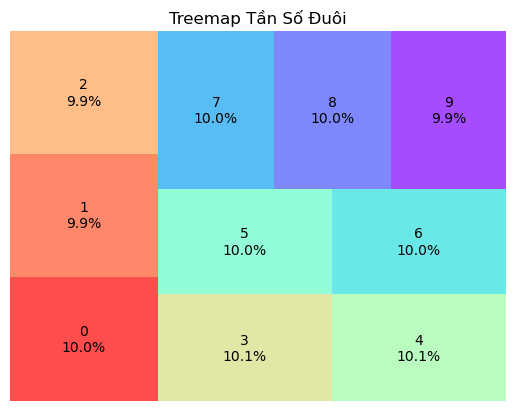

In [133]:
# Create a list of sizes
tail_sizes = tail_cnt.tolist()

# Create the treemap
squarify.plot(sizes=tail_sizes, label=df_new.apply(lambda x: f'{x[CN_BASE_NUM]}\n{x[CN_TAIL_CNT] / sum(tail_sizes) * 100:.1f}%', axis=1), color=cm.rainbow_r(np.linspace(0, 1, len(df_new))), alpha=0.7)

# Customize the formatting and display the treemap
plt.axis('off')
plt.title('Treemap Tần Số Đuôi')
plt.show()

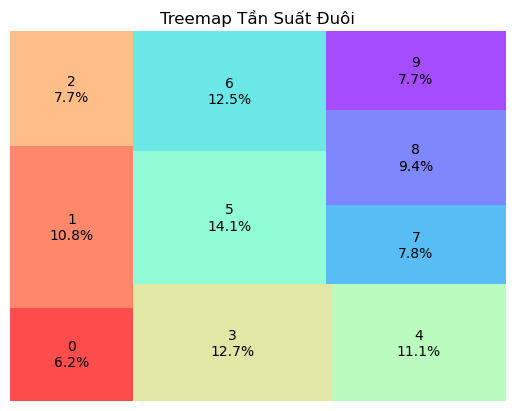

In [134]:
# Create a list of sizes
tail_rate_sizes = tail_rate.tolist()

# Create the treemap
squarify.plot(sizes=tail_rate_sizes, label=df_new.apply(lambda x: f'{x[CN_BASE_NUM]}\n{x[CN_TAIL_RATE] / sum(tail_rate_sizes) * 100:.1f}%', axis=1), color=cm.rainbow_r(np.linspace(0, 1, len(df_new))), alpha=0.7)

# Customize the formatting and display the treemap
plt.axis('off')
plt.title('Treemap Tần Suất Đuôi')
plt.show()

In [135]:
cnt_tails, intvl_tails = np.histogram(tail_cnt, bins=10)
mode_lctn_tail = np.argmax(cnt_tails)

In [136]:
min_tail = tail_cnt.min()
max_tail = tail_cnt.max()
mean_tail = tail_cnt.mean()
median_tail = tail_cnt.median()
mode_left_tail = intvl_tails[mode_lctn_tail]
mode_right_tail = intvl_tails[mode_lctn_tail + 1]

In [137]:
min_num_tail = cmp_col(df_new, tail_cnt, min_tail, CN_BASE_NUM)
max_num_tail = cmp_col(df_new, tail_cnt, max_tail, CN_BASE_NUM)
mean_num_tail = cmp_col(df_new, tail_cnt, cmp_val(tail_cnt, mean_tail), CN_BASE_NUM)
median_num_tail = cmp_col(df_new, tail_cnt, cmp_val(tail_cnt, median_tail), CN_BASE_NUM)
mode_num_tail_left = cmp_col(df_new, tail_cnt, cmp_val(tail_cnt, mode_left_tail), CN_BASE_NUM)
mode_num_tail_right = cmp_col(df_new, tail_cnt, cmp_val(tail_cnt, mode_right_tail), CN_BASE_NUM)

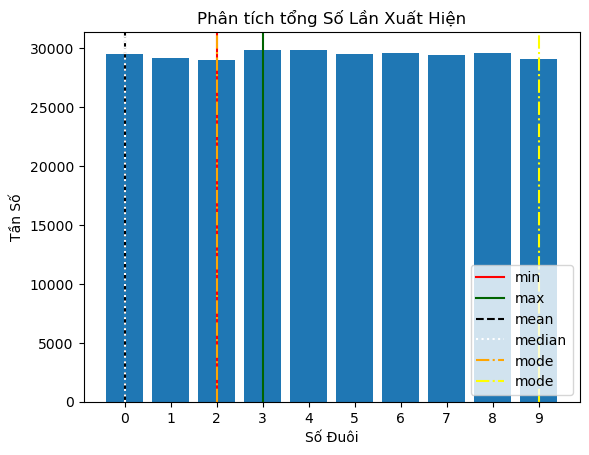

In [138]:
# Plot bar chart
plt.bar(base_num, tail_cnt)

# Add vertical lines
plt.axvline(min_num_tail, color='red', linestyle='-', label='min')
plt.axvline(max_num_tail, color='darkgreen', linestyle='-', label='max')
plt.axvline(mean_num_tail, color='black', linestyle='--', label='mean')
plt.axvline(median_num_tail, color='white', linestyle=':', label='median')
plt.axvline(mode_num_tail_left, color='orange', linestyle='-.', label='mode')
plt.axvline(mode_num_tail_right, color='yellow', linestyle='-.', label='mode')

# Add a legend
plt.legend(loc='lower right')

# Set the x and y axis labels and the title
plt.title('Phân tích tổng Số Lần Xuất Hiện')
plt.xlabel('Số Đuôi')
plt.ylabel('Tần Số')

# Set the x an y axis tick marks
plt.xticks(rng_num)

# Display the plot
plt.show()

## Result

In [139]:
crit_heads = [lin_reg(df_new, CN_HEAD_CNT, CN_HEAD_CONS, CN_BASE_NUM)]
heads = list(set(crit_heads + [prblty_calc(df_new, CN_HEAD_CNT, CN_HEAD_CONS, CN_BASE_NUM, True)]))

In [140]:
un_heads = list(range(mode_num_head_left, mode_num_head_right + 1))
un_heads = list(set(un_heads + [mean_num_head]))
un_heads = list(set(un_heads + [median_num_head]))

In [141]:
crit_tails = [lin_reg(df_new, CN_TAIL_CONS, CN_TAIL_CONS, CN_BASE_NUM)]
tails = list(set(crit_tails + [prblty_calc(df_new, CN_TAIL_CONS, CN_TAIL_CONS, CN_BASE_NUM, True)]))

In [142]:
un_tails = list(range(mode_num_tail_left, mode_num_tail_right + 1))
un_tails = list(set(un_tails + [mean_num_tail]))
un_tails = list(set(un_tails + [median_num_tail]))

In [143]:
lklys = []
for i in heads:
    for j in tails:
        lklys.append(int(str(i) + str(j)))

In [144]:
un_lklys = []
for i in un_heads:
    for j in un_tails:
        un_lklys.append(int(str(i) + str(j)))

In [145]:
print(f'''Số khuynh hướng: {[int(str(crit_heads[0])+ str(crit_tails[0]))]}
Các số có khả năng xuất hiện: {sorted(lklys)}
Các số ít khả năng xuất hiện: {[int(str(prblty_calc(df_new, CN_HEAD_CNT, CN_HEAD_CONS, CN_BASE_NUM, False)) + str(prblty_calc(df_new, CN_TAIL_CONS, CN_TAIL_CONS, CN_BASE_NUM, False)))]}
Các số tập trung: {sorted(un_lklys)}''')

Số khuynh hướng: [44]
Các số có khả năng xuất hiện: [44, 45, 74, 75]
Các số ít khả năng xuất hiện: [40]
Các số tập trung: [10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59]
